# Value Function Approximation

Canvas > Files > codes

## Review Numpy Inner Product
Vectors: $\mathbf{x}, \mathbf{w}$

Inner product: $\mathbf{x}^\top \mathbf{w}$

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:

x = np.array([1, 2])
w = np.array([3, 4])

ip = np.dot(x, w) # inner product / dot product
print(ip)

11


## Representing States with Feature Vectors
Let's decide how we represent states using features.

Define a function $x$ that maps a state to the corresponding feature vector

$$x(S_1) = [1,1]$$
$$x(S_2) = [2,1]$$

## Approximating Value Function
Now, instead of storing the value function $v$ in a table, let's parameterize $v$ with weight $\mathbf{w}$.

$$v(S,\mathbf{w}) = x(S)^\top \mathbf{w}= \sum_j x_j(S)\mathbf{w}_j$$

e.g. If $\mathbf{w} = [1,1]$, the V value of state $S_1$ and $S_2$ are:

In [ ]:
xs1 = np.array([1, 1])
xs2 = np.array([1, 2])

xs3 = np.array([1, 2])
xs4 = np.array([1, 2])

# table of V
# V = [3.4, 3] 


#initial weight w
w = np.array([1, 1])

# linear approx
vs1 = np.dot(xs1, w)
vs2 = np.dot(xs2, w)
print(f'V(S1) = {vs1}, V(S2) = {vs2}')

V(S1) = 2, V(S2) = 3


So if we change $\mathbf{w}$, we can change the value function.

But how do we choose a nice $\mathbf{w}$ to have an accurate V values for all states?

We want to approximate TRUE value function $v$. Assume a blackbox algorithm gave us the true value funcrion. For example, $v(S_1) = 4$, and $v(S_2) = 6$.








----------------------------
I think you can understand the benefits of function approx now, comparing it with the tabular method.
1. Even when you visit a state (e.g. $S_1$), the value function of the other states is also updated (e.g. $S_2$).
2. You can reduce memory to save the value function. Imagine you have 1 million states like $S_1$. If it's the tabular method, you need to store 1 million entries of $(s, v(s))$. If it's function approx, you only store two numbers $w = (w_1, w_2)$.
----------------------------

In [ ]:
w = np.array([2, 2])

vs1 = np.dot(xs1, w)
vs2 = np.dot(xs2, w)
print(f'V(S1) = {vs1}, V(S2) = {vs2}')

V(S1) = 4, V(S2) = 6


So we know $\mathbf{w}^* = [2,2]$ is the best parameter approximating $v$. 

Is there any way to find such $\mathbf{w}^*$? The best $\mathbf{w}^*$ should minimize the loss function:
$$J(\mathbf{w})=\mathbb{E}_{\pi}\left[\left(v(S)-\mathbf{x}(S)^{\top} \mathbf{w}^*\right)^{2}\right]$$
This is becase, in the ideal scenario, $v(s) = \mathbf{x}(S)^{\top} \mathbf{w}^*$

Here, it is a simple minimization of function $J(\mathbf{w})$. Therefore, we can use the gradient descent method to solve it.

$$\begin{aligned} \Delta \mathbf{w} &=-\frac{1}{2} \alpha \nabla_{\mathbf{w}} J(\mathbf{w}) \\ &=\alpha \mathbb{E}_{\pi}\left[\left(v_{\pi}(S)-\hat{v}(S, \mathbf{w})\right) \nabla_{\mathbf{w}} \hat{v}(S, \mathbf{w})\right] \end{aligned}$$

Then, $$\mathbf{w} \gets \mathbf{w} + \Delta \mathbf{w}$$

If it is stochastic GD, we can use the following:
$$\Delta \mathbf{w}=\alpha\left(v_{\pi}(S)-\hat{v}(S, \mathbf{w})\right) \nabla_{\mathbf{w}} \hat{v}(S, \mathbf{w})$$

Since we have $v(s) = \mathbf{x}(S)^{\top} \mathbf{w}^*$, $$\nabla_{\mathbf{w}} v(S, \mathbf{w}) = x(S).$$

In [ ]:
def plotJs(Js, show_limit = 80):
  plt.plot(range(0,show_limit), Js[0:show_limit], label='J')
  plt.ylabel('Loss Function J')
  plt.xlabel('Iteration Round')
  plt.plot()
  plt.show()

w: [1.04 1.04], J: 4
w: [1.78652822 2.13021135], J: 0.0027214669861636972
w: [1.81554813 2.11262607], J: 0.005597814074588448
w: [1.84507408 2.10108556], J: 0.003145382031234326
w: [1.8627489  2.08003329], J: 0.0006426497489334478
w: [1.88279924 2.06988234], J: 0.0006285560402270214
w: [1.90103441 2.06378926], J: 0.001342636793659103
w: [1.91247258 2.05111337], J: 0.0002667531753366021
w: [1.92390906 2.04430128], J: 0.00019326013215202888
w: [1.93351283 2.03842204], J: 0.000854656619630592
w: [1.94176219 2.03354176], J: 0.0006617782669494566
w: [1.95117225 2.03114323], J: 0.00033934701588353466
w: [1.95766904 2.02630053], J: 0.0002788356593775597
w: [1.96358999 2.02326252], J: 0.00012631341611305327
w: [1.9672166  2.01815724], J: 1.539324042361247e-05
w: [1.97294431 2.01737106], J: 0.00010177087226536199
w: [1.97717834 2.01542662], J: 5.933875661954734e-05
w: [1.97971019 2.01234503], J: 6.848902914924708e-05
w: [1.98237775 2.01045241], J: 1.3302840546445935e-05
w: [1.98456804 2.0087833

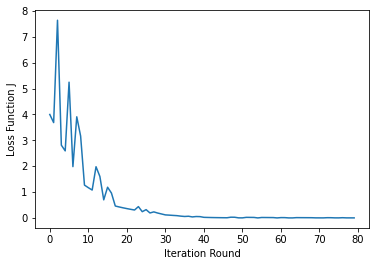

In [ ]:
num_iter = 10000

# step size
alpha = 0.02

true_vs1 = 4
true_vs2 = 6

# initialization
w = np.array([1,1])

# randomly pick one of the states 
# and execute the stochastic gradient

Js = []

for i in range(num_iter):
  if random.random() < 0.5:
    xs = xs1
    true_vs = true_vs1
  else:
    xs = xs2
    true_vs = true_vs2

  vs = np.dot(xs, w) # calc the current approx of V(s)
  
  J = pow(true_vs - vs, 2) # calc the loss func J

  w = w + alpha * (true_vs - vs) * xs # update w

  # print(f'xs: {xs}')

  Js.append(J)

  # Print every 100 rounds
  if i % 100 == 0:
    print(f'w: {w}, J: {J}')

print(f'Final w: {w}')
plotJs(Js)

However, we do not know the true value function in an arbitaral MDP. (This was the motivation why we started learning RL.) 

What we have access to is sequences of $s, a, r, s^\prime, ...$. We know how we can estimate the true $v$ using a lot of experiences by MC, TD, and other control methods!

If it is MC, we can use return $G_t$ of an episode. We can simply replace the $v_{\pi}(S)$ term in SGD with $G_t$.

$$\Delta \mathbf{w}=\alpha\left(G_t-\hat{v}(S, \mathbf{w})\right) \nabla_{\mathbf{w}} \hat{v}(S, \mathbf{w})$$

For example, if it is MC:

Instead of 
```
  w = w + alpha * (true_vs - vs) * xs

  J = pow(true_vs - vs, 2)

```
we will use
```
  w = w + alpha * (Gt - vs) * xs

  J = pow(Gt - vs, 2)
```

As the accumulation of Gt estimates the true value funciton, it should approximate the targe


(X is a terminal state.)

In [ ]:
episodes = [
            ['s1', 'a1', '3', 'X'],
            ['s2', 'a2', '4', 'X'],
            ['s1', 'a2', '3.8', 'X'],
            ['s1', 'a1', '-0.2', 's2', 'a1', '8', 'X'],
            ['s1', 'a2', '4.5', 'X'],
            ['s1', 'a3', '1', 's2', 'a1', '7', 'X'],
            ['s2', 'a3', '6.5', 'X'],
            ['s1', 'a4', '4.3', 'X'],
            ['s2', 'a4', '6.6', 'X']]

gamma = 0.9

# initialization
w = np.array([1,1])
Js = []

num_iter = 10

# batch RL

for round in range(num_iter):
  # randomly pick one episode (replay buffer)
  epi = random.choice(episodes)

  state_index = 0
  if epi[state_index] == 's1':
    xs = xs1
  elif epi[state_index] == 's2':
    xs = xs2

  Gt = 0
  num_exp = 0
  while True:
    #compute Gt
    Gt += pow(gamma, num_exp) * float(epi[state_index + 2])
    #print(Gt)

    vs = np.dot(xs, w) # current estimate
    w = w + alpha * (Gt - vs) * xs # update w with Gt

    J = pow(Gt - vs, 2) # loss func with Gt

    Js.append(J)

    # End of the episode
    if epi[state_index + 3] == 'X':
      break
    # does have another state in the episode
    else:
      num_exp += 1
      state_index += 3      

  # Print every 100 episode
  if round % 1 == 0:
    print(f'w: {w}, J: {J}')

print(f'Final w: {w}')
# plotJs(Js)

w: [1.05 1.05], J: 6.25
w: [1.098 1.098], J: 5.76
w: [1.11408 1.11408], J: 0.6464159999999998
w: [1.1455168 1.1455168], J: 2.4706809855999983
w: [1.20678579 1.26805478], J: 9.384723451740156
w: [1.23328898 1.29455797], J: 1.75604749901601
w: [1.29939738 1.36066637], J: 23.360469169830132
w: [1.3221961 1.3834651], J: 1.2994546498510027
w: [1.37241358 1.48390004], J: 6.304486744075664
w: [1.37528731 1.48677377], J: 0.02064577468986716
Final w: [1.37528731 1.48677377]
